# 0. Librerías

Importación de librerías y herramientas para el correcto funcionamiento del código.

In [182]:
# Librerías 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import median_test
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

#Para que grafique
%matplotlib inline

# 1. Inicializacion

Carga de datos y vista superficial del dataset.

In [2]:
dataset_raw=pd.read_csv("winequality_BDS.csv",sep=';')

dataset_raw.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates alcohol  quality  
0       0.42    11.8        6  
1       0.39    10.2        6  
2       0.53    12.7        6  
3       0.56     9.4        5  
4       0.38    10.2        5

In [3]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


# 2. EDA

Exploracion y transformación de los datos.

Explicacion de variables:

1.	type: tipo de uva con la que se elabora el vino.
2.	fixed acidity: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
3.	volatile acidity: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 
4.	citric acid: contenido de ácido cítrico en el vino, medido en gramos por litro.
5.	residual sugar: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro. 
6.	chlorides: concentración de cloruros (sales) en el vino, medida en gramos por litro.
7.	free sulfur dioxide: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 
8.	total sulfur dioxide: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
9.	density: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
10.	pH: medida de la acidez o alcalinidad del vino. 
11.	sulphates: concentración de sales de sulfato en el vino, medida en gramos por litro. 
12.	alcohol: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
13.	quality: puntuación del vino, con una escala que va de 0 a 10.

## 2.1. Analisis univariado.

Analizamos los valores de cada columna y evaluamos su validez.

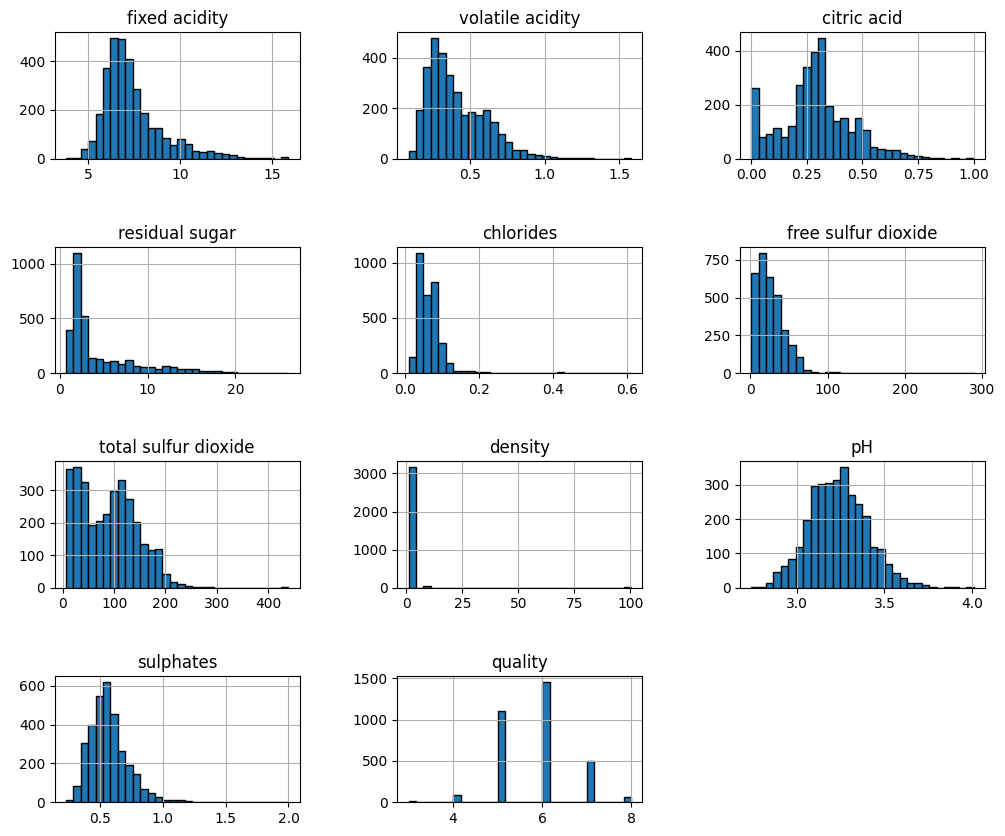

In [4]:
#Construimos histogramas mostrando la distribución de las caracteristicas de los vinos en dataset_raw
dataset_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Observamos variables de manera individual:
* Las variables 'fixed acidity', 'sulphates', 'residual sugar', 'volatile acidity', 'total sulfur dioxide', 'free sulfur dioxide' y 'citric acid' presentan un sesgo a derecha.
* 'chlorides', 'density', 'free sulfur dioxide' y 'total sulfur dioxide' están (probablemente) afectadas por outliers.
* Los histogramas 'citric acid' y 'total sulfur dioxide' son bimodales.

Para complementar este análisis gráfico, visualizaremos las estadísticas de cada variable:

In [5]:
dataset_raw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3231.000000       3231.000000  3231.000000     3231.000000   
mean        7.414082          0.403802     0.288028        4.526339   
std         1.598760          0.189421     0.156842        4.143991   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.360000     0.280000        2.500000   
75%         8.000000          0.530000     0.370000        6.100000   
max        15.900000          1.580000     1.000000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3231.000000          3231.000000           3231.000000  3231.000000   
mean      0.066149            25.649335             88.349892     1.901500   
std       0.041908            17.422288             54.633913     8.747779   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992550   
50%       0.058000            23.000000             89.000000     0.995500   
75%       0.080000            35.000000            127.000000     0.997230   
max       0.611000           289.000000            440.000000   100.369000   

                pH    sulphates      quality  
count  3231.000000  3231.000000  3231.000000  
mean      3.235908     0.573680     5.785825  
std       0.164921     0.166353     0.829374  
min       2.740000     0.230000     3.000000  
25%       3.120000     0.470000     5.000000  
50%       3.230000     0.550000     6.000000  
75%       3.340000     0.650000     6.000000  
max       4.010000     2.000000     8.000000

Confirmamos que es altamente probable que chlorides, free sulfur dioxide, total sulfur dioxide y density tengan outliers que haya que tratar.

Proseguimos con el análisis de los valores de cada variable.

### 2.1.1. Type (Tipo de uva)

Analizamos la columna type.

In [4]:
dataset_raw["type"].value_counts().sort_index()

type
Moscatel    1632
Syrah       1599
Name: count, dtype: int64

No hay valores nulos.

### 2.1.2. Fixed acidity (Ácidos no volatiles)

Analizamos la columna fixed acidity.

In [52]:
dataset_raw["fixed acidity"].value_counts().sort_index()

fixed acidity
3.8     1
3.9     1
4.4     3
4.6     1
4.7     6
       ..
14.3    1
15.0    2
15.5    2
15.6    2
15.9    1
Name: count, Length: 100, dtype: int64

Siendo el valor minimo 3.8 y el máximo 15.9, no parece haber nulos o outliers.

### 2.1.3. Volatile acidity (Ácidos volátiles)

Analizamos la columna volatile acidity.

In [220]:
dataset_raw["volatile acidity"].value_counts().sort_index()

volatile acidity
0.085     1
0.090     1
0.105     4
0.110     5
0.120    10
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: count, Length: 172, dtype: int64

Siendo el minimo 0.085 y el máximo 1.58 no parece haber nulos. Los últimos valores pueden ser outliers.

### 2.1.4. Citric acid (Ácidos cítricos)

Analizamos la columna citric acid.

In [221]:
for a,b in dataset_raw["citric acid"].value_counts().sort_index().items():
    print(a,b)

0.0 140
0.01 37
0.02 53
0.03 30
0.04 32
0.05 21
0.06 26
0.07 22
0.08 33
0.09 37
0.1 40
0.11 16
0.12 36
0.13 22
0.14 28
0.15 29
0.16 24
0.17 29
0.18 45
0.19 45
0.2 64
0.21 62
0.22 74
0.23 71
0.24 117
0.25 92
0.26 130
0.27 125
0.28 156
0.29 115
0.3 146
0.31 86
0.32 126
0.33 88
0.34 78
0.35 59
0.36 59
0.37 52
0.38 42
0.39 46
0.4 56
0.41 40
0.42 38
0.43 18
0.44 35
0.45 36
0.46 29
0.47 30
0.48 38
0.49 81
0.5 35
0.51 21
0.52 28
0.53 21
0.54 19
0.55 12
0.56 12
0.57 15
0.58 10
0.59 9
0.6 11
0.61 5
0.62 5
0.63 10
0.64 9
0.65 7
0.66 16
0.67 4
0.68 11
0.69 6
0.7 2
0.71 4
0.72 2
0.73 4
0.74 5
0.75 1
0.76 3
0.78 2
0.79 2
0.82 1
0.86 1
0.91 2
1.0 2


Analizamos aquellos vinos con citric acid en 0 para buscar algun comportamiento extraño en las otras variables.

In [6]:
cero_cacid=dataset_raw[dataset_raw["citric acid"]==0].drop(columns="citric acid")

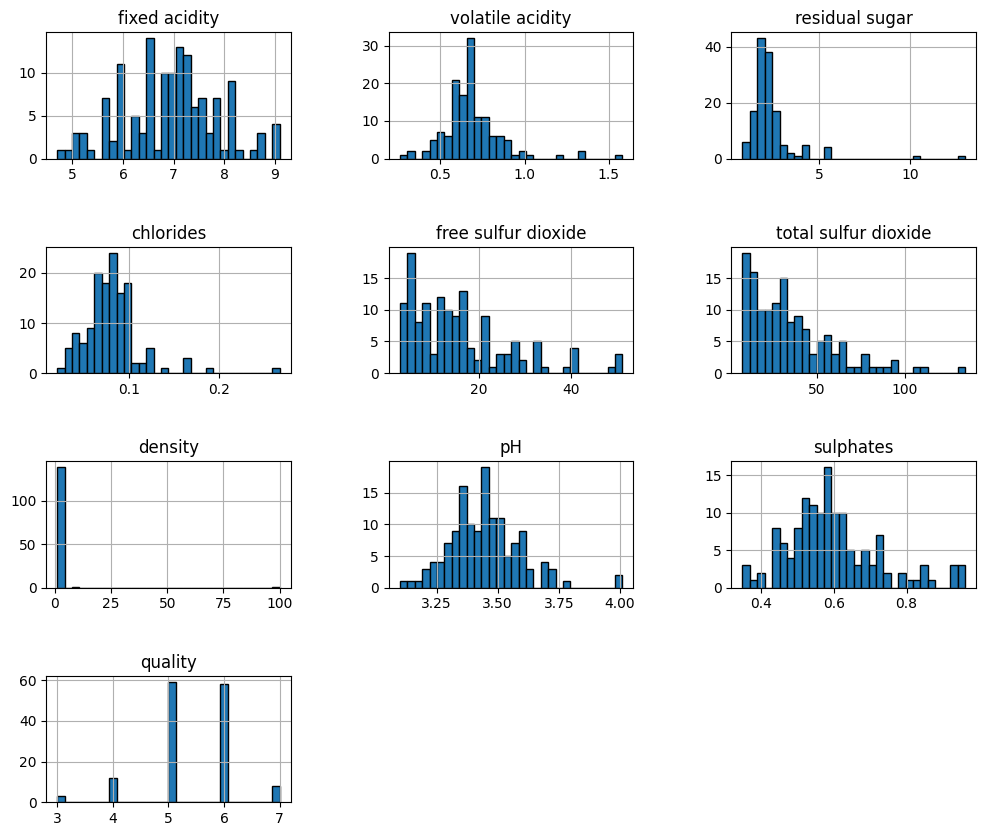

In [7]:
cero_cacid.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Más alla de los problemas que heredó del dataset completo (p.e. outliers de densidad), no parece que estos vinos sean datos sucios.

### 2.1.5. Residual sugar (Azúcar residual)

Analizamos la columna residual sugar.

In [57]:
dataset_raw["residual sugar"].value_counts().sort_index()

residual sugar
0.70      2
0.80      5
0.90     16
1.00     29
1.10     53
         ..
20.15     1
20.30     1
20.80     1
22.60     1
26.05     2
Name: count, Length: 234, dtype: int64

No parece haber nulos. Los últimos pueden ser outliers.

### 2.1.6. Chlorides (Concentración de cloruros)

Analizamos la columna chlorides.

In [223]:
for a,b in dataset_raw["chlorides"].value_counts().sort_index().items():
    print(a,b)

0.009 1
0.012 2
0.013 1
0.014 2
0.015 4
0.016 1
0.017 3
0.018 4
0.019 1
0.02 6
0.021 6
0.022 7
0.023 9
0.024 8
0.025 7
0.026 19
0.027 18
0.028 24
0.029 26
0.03 37
0.031 35
0.032 52
0.033 43
0.034 52
0.035 59
0.036 81
0.037 52
0.038 52
0.039 45
0.04 54
0.041 59
0.042 61
0.043 43
0.044 74
0.045 41
0.046 55
0.047 63
0.048 80
0.049 50
0.05 71
0.051 48
0.052 48
0.053 49
0.054 46
0.055 27
0.056 35
0.057 40
0.058 29
0.059 29
0.06 34
0.061 16
0.062 32
0.063 26
0.064 26
0.065 24
0.066 37
0.067 27
0.068 34
0.069 28
0.07 37
0.071 48
0.072 24
0.073 35
0.074 56
0.075 46
0.076 55
0.077 47
0.078 51
0.079 43
0.08 66
0.081 40
0.082 46
0.083 35
0.084 50
0.085 27
0.086 34
0.087 27
0.088 33
0.089 25
0.09 22
0.091 19
0.092 22
0.093 21
0.094 22
0.095 24
0.096 21
0.097 19
0.098 15
0.099 8
0.1 13
0.101 5
0.102 10
0.103 7
0.104 16
0.105 7
0.106 8
0.107 9
0.108 2
0.109 3
0.11 10
0.111 7
0.112 6
0.113 1
0.114 11
0.115 5
0.116 2
0.117 7
0.118 9
0.119 3
0.12 4
0.121 2
0.122 7
0.123 6
0.124 3
0.125 1
0.126 1
0.127 

A simple vista parece no haber valores problemáticos, pero reforzaremos el análisis con un boxplot:

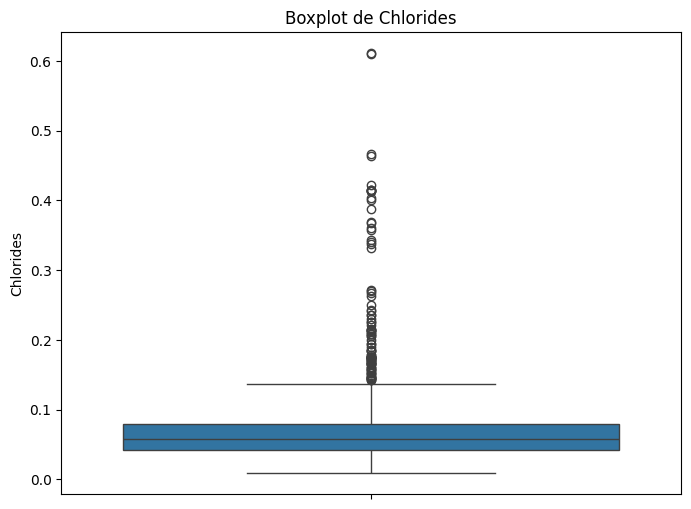

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y="chlorides", data=dataset_raw)

# Agregar etiquetas a los ejes
plt.ylabel("Chlorides")

# Agregar un título al gráfico
plt.title("Boxplot de Chlorides")

# Mostrar el gráfico
plt.show()

La columna chlorides es afectada por outliers.

### 2.1.7. Free sulfur dioxide (Anhidrido sulfuroso libre)

Analizamos la columna free sulfur dioxide.

In [61]:
dataset_raw["free sulfur dioxide"].value_counts().sort_index()

free sulfur dioxide
1.0        3
2.0        2
3.0       51
4.0       43
5.0      110
        ... 
105.0      2
108.0      3
112.0      1
124.0      1
289.0      1
Name: count, Length: 99, dtype: int64

Siendo el mínimo 1 y el máximo 289, suponemos que este último es un outlier (habiendo una diferencia de más de 160 mg/l con el valor anterior). 

### 2.1.8. Total sulfur dioxide (Anhidrido sulfuroso total)

Analizamos la columna total sulfur dioxide.

In [62]:
dataset_raw["total sulfur dioxide"].value_counts().sort_index()

total sulfur dioxide
6.0       3
7.0       4
8.0      14
9.0      15
10.0     28
         ..
251.0     1
259.0     1
278.0     1
289.0     1
440.0     1
Name: count, Length: 228, dtype: int64

Entendiendo la relacion de esta variable con la anterior (siendo esta es la suma de la anterior más otro valor), veremos si se trata del mismo vino:

In [63]:
vino289=dataset_raw[dataset_raw["free sulfur dioxide"]==289]

print(vino289)

          type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1479  Moscatel            6.1              0.26         0.25             2.9   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1479      0.047                289.0                 440.0  0.99314  3.44   

      sulphates alcohol  quality  
1479       0.64    10.5        3  


Efectivamente se trata de la misma fila que actúa como outlier para ambas variables.

### 2.1.9. Density (Densidad, concentración de sólidos disueltos)

Analizamos la columna density.

In [64]:
dataset_raw["density"].value_counts().sort_index()

density
0.98711      1
0.98722      1
0.98740      1
0.98742      2
0.98746      2
            ..
100.24200    2
100.28900    1
100.29500    2
100.31500    3
100.36900    2
Name: count, Length: 865, dtype: int64

Valores por encima de 1g/L nos indican que muy probablemente hayan sido mal cargados.

### 2.1.10. pH

Analizamos la columna pH.

In [65]:
dataset_raw["pH"].value_counts().sort_index()

pH
2.74    1
2.79    1
2.80    1
2.82    1
2.83    4
       ..
3.76    1
3.78    2
3.85    1
3.90    2
4.01    2
Name: count, Length: 98, dtype: int64

Siendo 2.74 el valor mínimo y el máximo 4.01, se asume que son válidos y no hay nulos o outliers.

### 2.1.11. Sulphates (Concentración de sales de sulfato)

In [66]:
dataset_raw["sulphates"].value_counts().sort_index()

sulphates
0.23    1
0.25    1
0.26    3
0.27    6
0.28    2
       ..
1.61    1
1.62    1
1.95    2
1.98    1
2.00    1
Name: count, Length: 110, dtype: int64

Siendo el mínimo 0.23 y el máximo 2.0 no parece haber nulos o outliers.

### 2.1.12. Alcohol (Contenido alcoholico)

Revisamos a detalle los valores de la columna alcohol, ya que aparece como object, cuando en el head() vimos que había float:

In [ ]:
for idx, val in dataset_raw["alcohol"].value_counts().sort_index().items():
    print(idx,val)

10 98
10.1 81
10.15 3
10.2 81
10.3 53
10.4 87
10.5 107
10.55 4
10.6 58
10.65 1
10.7 64
10.75 1
10.8 86
10.9 80
10.98 1
100.333.333.333.333 3
101.333.333.333.333 2
104.666.666.666.667 2
105.333.333.333.333 1
105.666.666.666.667 1
109.333.333.333.333 2
109.666.666.666.667 3
11 120
11.05 2
11.1 70
11.2 90
11.3 74
11.35 1
11.4 72
11.45 4
11.5 65
11.55 1
11.6 31
11.65 1
11.7 45
11.75 2
11.8 56
11.85 1
11.9 33
11.94 2
11.95 2
110.666.666.666.667 2
112.666.666.666.667 1
113.333.333.333.333 3
113.666.666.666.667 1
114.333.333.333.333 1
114.666.666.666.667 1
116.333.333.333.333 2
117.333.333.333.333 1
12 52
12.05 1
12.1 33
12.15 2
12.2 45
12.25 1
12.3 36
12.4 47
12.5 62
12.6 30
12.7 34
12.75 3
12.8 42
12.9 30
120.666.666.666.667 1
123.333.333.333.333 1
128.933.333.333.333 2
13 31
13.05 1
13.1 18
13.2 13
13.3 6
13.4 18
13.5 6
13.55 1
13.6 13
13.7 3
13.8 2
13.9 2
131.333.333.333.333 1
135.666.666.666.667 1
14 9
14.05 1
14.2 1
14.9 1
8.4 5
8.5 5
8.6 2
8.7 19
8.8 33
8.9 16
9 68
9.05 1
9.1 71
9.2 13

Vemos que hay valores que suponemos que son periodicos mal cargados.

### 2.1.13. Quality (Puntuacion de calidad del vino de consumidores)

Analizamos la columna quality.

In [102]:
dataset_raw["quality"].value_counts().sort_index()

quality
3      14
4      92
5    1103
6    1453
7     501
8      68
Name: count, dtype: int64

Los valores son validos. 

## 2.2. Transformación de los datos
Tomamos decisiones sobre los datos sucios.

Una vez vistos los valores de cada columna, decidimos transformar los tipos de columna a los correctos, eliminar aquellas muestras que tienen valores fuera de rango (en anhidrido sulfuroso libre y total), aquellas muestras que suponemos que tienen datos que fueron mal cargados (en densidad y alcohol) y muestras que actúan como outliers (chlorides).

In [8]:
# Copiamos el dataset a uno que podamos transformar.
preprocessed_dataset=dataset_raw.copy()

Columna 'type' (object -> string)

In [9]:
preprocessed_dataset["type"]=preprocessed_dataset["type"].astype("string")

Columnas 'total sulfur dioxide' y 'free sulfur dioxide' (descarte de outlier)

In [10]:
#Mantenemos solo las filas que no tengan "total sulfur dioxide" igual a 440.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["total sulfur dioxide"]!=440.0]

Columnas 'alcohol', 'chlorides' y 'density' (descarte de filas mal cargadas y outliers) 

In [ ]:
# Mantenemos solo las filas que el valor en alcohol tenga una longitud menor a 8 caracteres.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset['alcohol'].astype(str).str.len() < 8]

# Tranformamos la columna de object a float64.
preprocessed_dataset["alcohol"]=preprocessed_dataset["alcohol"].astype("float64")

# Mantenemos solo las filas que tengan una densidad menor a 1.02.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["density"]<=1.020]

# Mantenemos solo las filas que tengan una concentracion de cloruros menor a 0.3.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["chlorides"]<=0.3]

Realizadas las transformaciones y ahora con datos válidos, visualizamos los histogramas de cada columna.

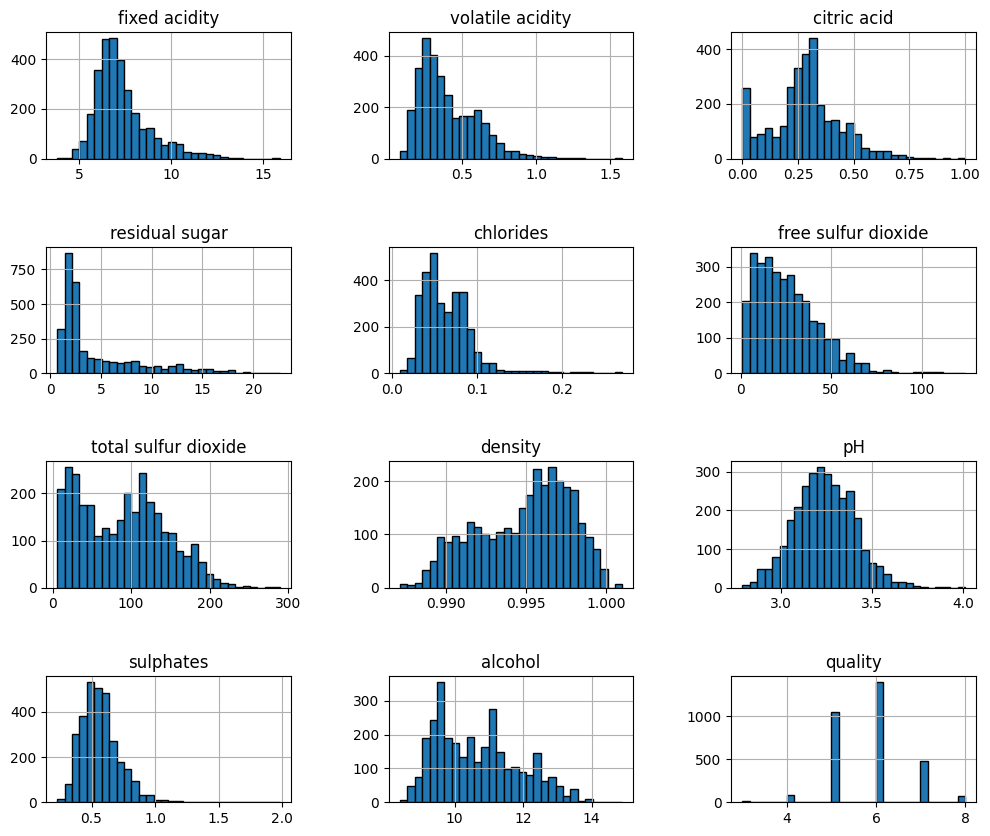

In [123]:
preprocessed_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## 2.3. Analisis bivariado
Analizamos la relacion entre las variables de a pares.

### 2.3.1. Matrices de correlación

Imprimimos matriz de correlaciones teniendo en cuenta unicamente las variables cuantitativas continuas.

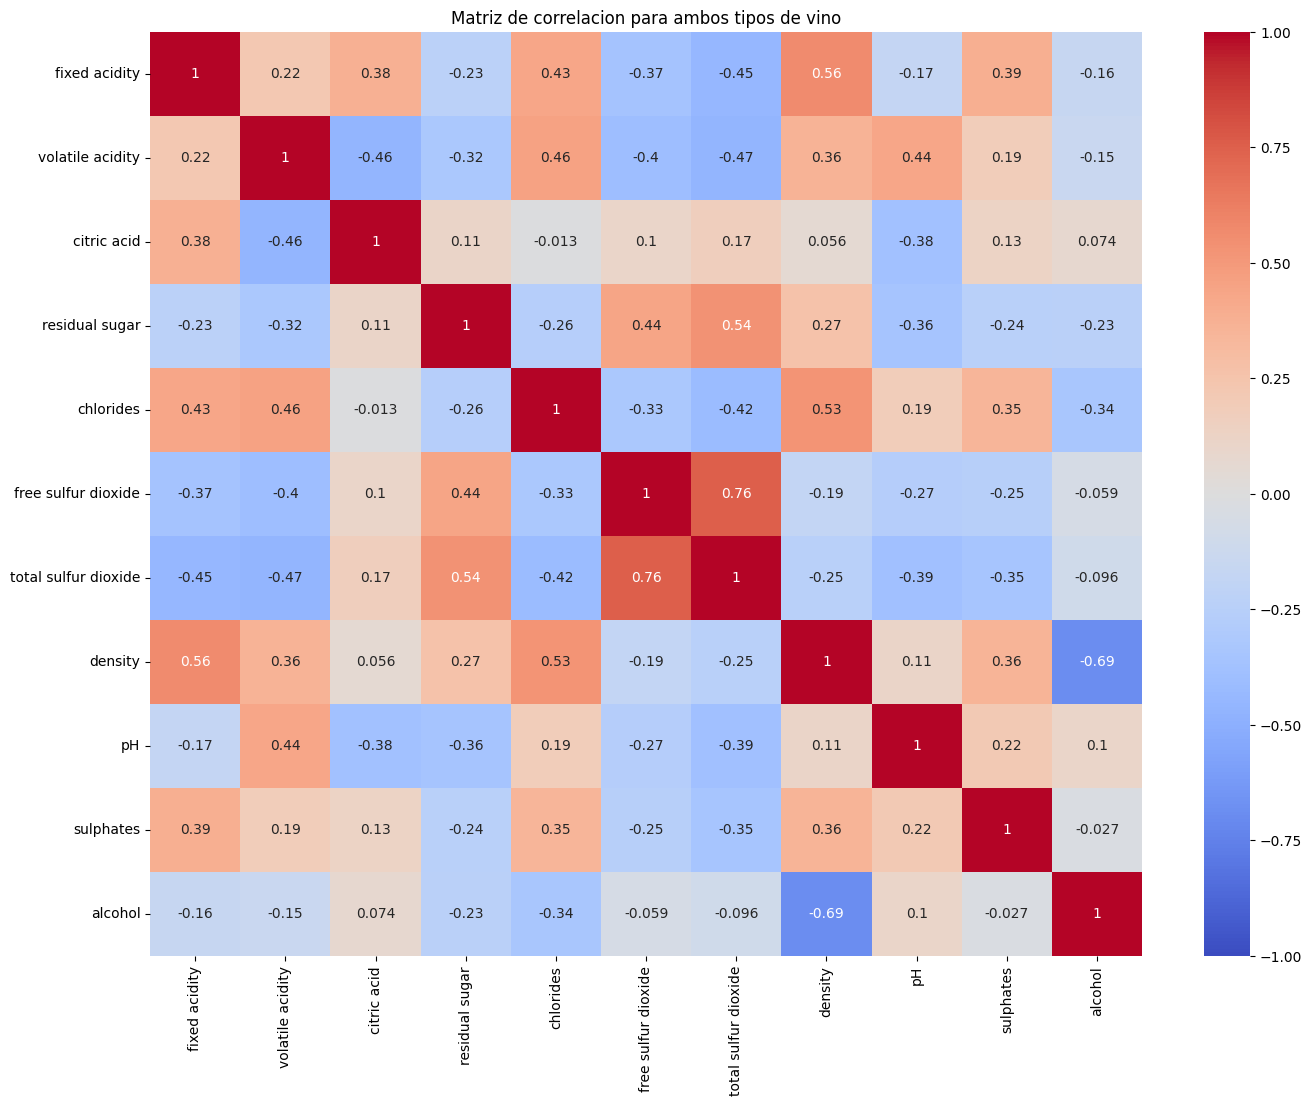

In [138]:
plt.figure(figsize=(16,12))
sns.heatmap(preprocessed_dataset.drop(columns=["type","quality"]).corr(), vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.title("Matriz de correlacion para ambos tipos de vino")
plt.show()

Con el objetivo de profundizar el análisis, vamos a dividir el dataset por tipo. 

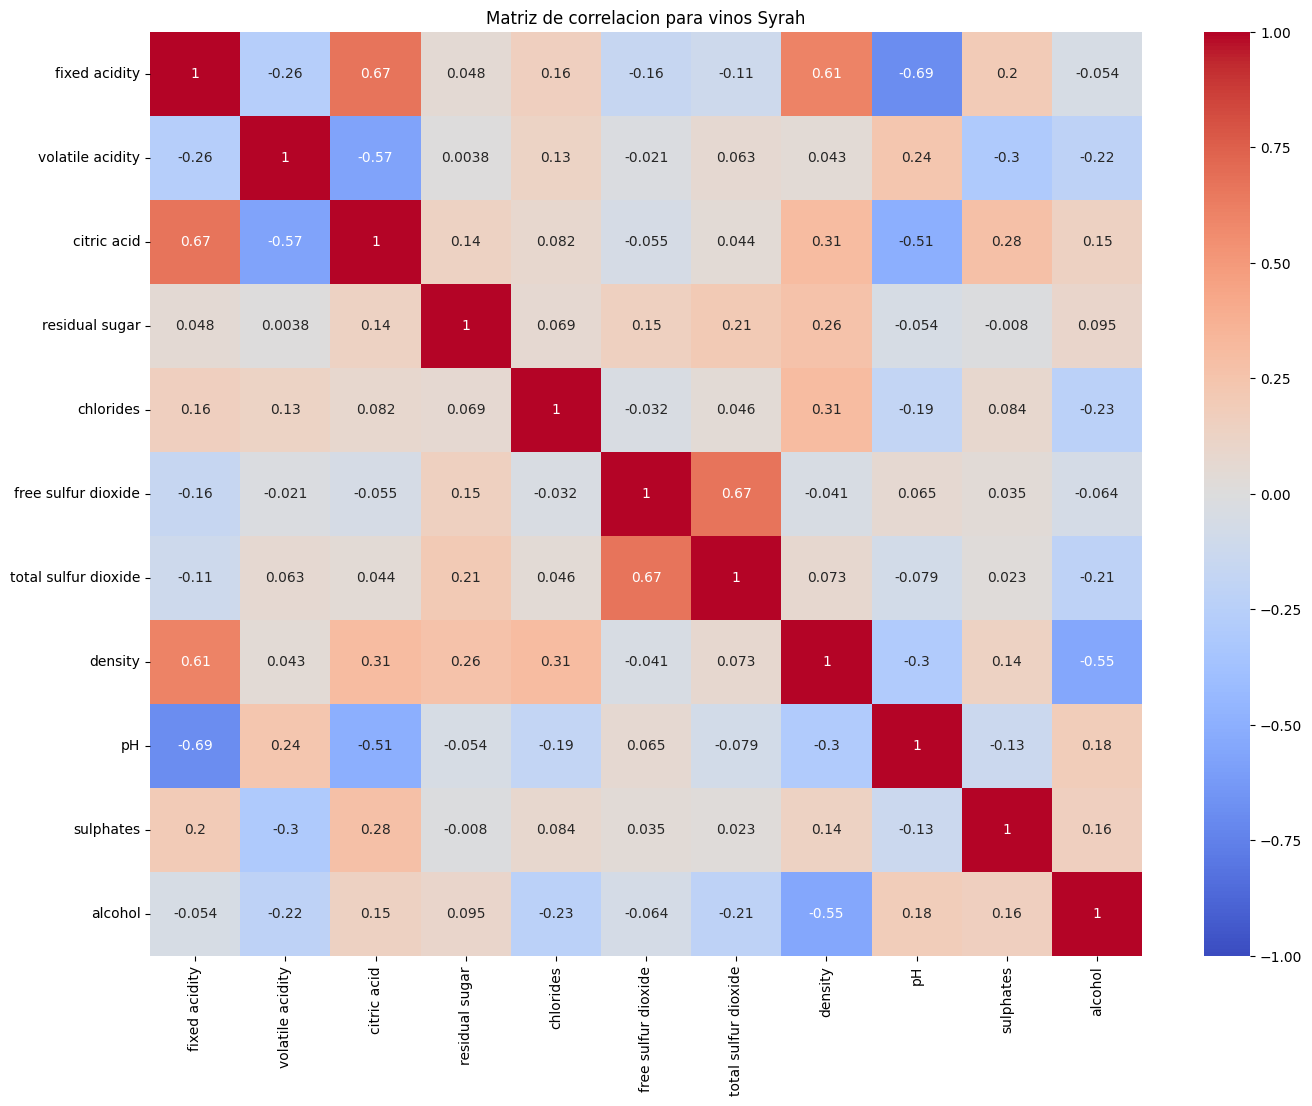

In [139]:
syrah_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Syrah"]
syrah_dataset=syrah_dataset.drop(columns="type")

plt.figure(figsize=(16,12))
sns.heatmap(syrah_dataset.drop(columns=["quality"]).corr(), vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.title("Matriz de correlacion para vinos Syrah")
plt.show()

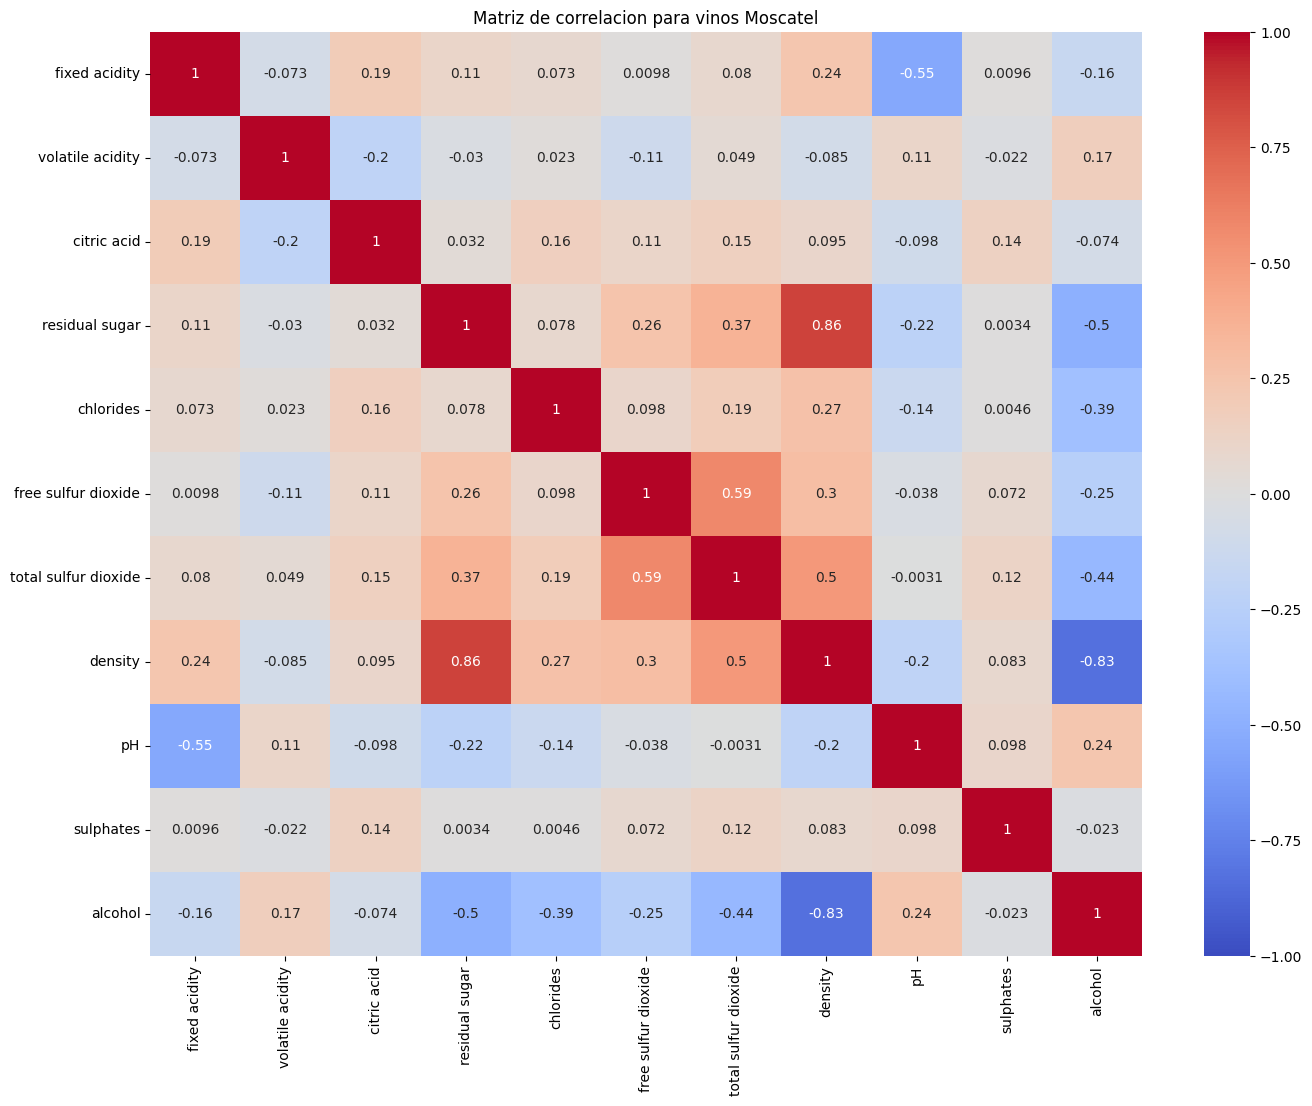

In [140]:
moscatel_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Moscatel"]
moscatel_dataset=moscatel_dataset.drop(columns="type")

plt.figure(figsize=(16,12))
sns.heatmap(moscatel_dataset.drop(columns=["quality"]).corr(), vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.title("Matriz de correlacion para vinos Moscatel")
plt.show()

### 2.3.2. Scatter plots

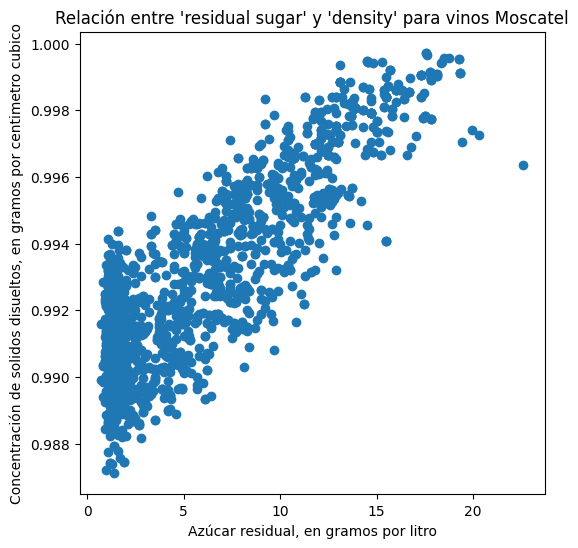

In [141]:
plt.figure(figsize=(6, 6)) 
plt.scatter(moscatel_dataset["residual sugar"], moscatel_dataset["density"])
plt.xlabel("Azúcar residual, en gramos por litro")
plt.ylabel("Concentración de solidos disueltos, en gramos por centimetro cubico")
plt.title("Relación entre 'residual sugar' y 'density' para vinos Moscatel")
plt.show()

## 2.4. Analisis multivariado
Analizamos las relaciones entre las variables.

### 2.4.1. General

Para analizar multivariado, descartamos las columnas con variables cualitativas.

In [142]:
mv_dataset=preprocessed_dataset.drop(columns=["quality","type"])

Analizamos el desvio de cada variable

In [143]:
mv_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3093.000000       3093.000000  3093.000000     3093.000000   
mean        7.328063          0.402540     0.282166        4.487973   
std         1.461430          0.190175     0.152958        4.076097   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.350000     0.280000        2.400000   
75%         7.900000          0.530000     0.360000        6.100000   
max        15.900000          1.580000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3093.000000          3093.000000           3093.000000  3093.000000   
mean      0.063339            25.647268             88.631587     0.994848   
std       0.029801            16.784689             54.326367     0.002912   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992480   
50%       0.057000            23.000000             90.000000     0.995450   
75%       0.079000            35.000000            128.000000     0.997140   
max       0.271000           124.000000            289.000000     1.001000   

                pH    sulphates      alcohol  
count  3093.000000  3093.000000  3093.000000  
mean      3.239292     0.567009    10.653899  
std       0.164774     0.156268     1.210742  
min       2.790000     0.230000     8.400000  
25%       3.130000     0.460000     9.600000  
50%       3.230000     0.550000    10.500000  
75%       3.350000     0.640000    11.450000  
max       4.010000     1.980000    14.900000

Los desvíos difieren en ampliamente en magnitudes. Hay que estandarizar.

In [144]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(mv_dataset)

#### 2.4.1.1. PCA

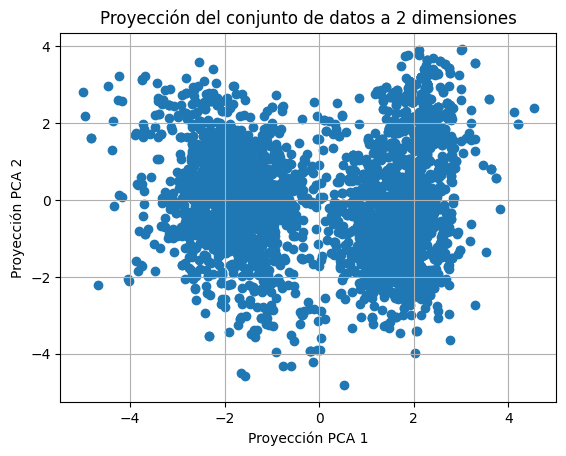

[0.33903357 0.20250361]


In [145]:
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset_scaled)

plt.scatter(pca_dataset[:,0], pca_dataset[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()
print(pca.explained_variance_ratio_)

Vemos que el grafico explica alrededor de 53% de la varianza. 33% en la primera componente y 20% en la segunda.

Pintamos las muestras por tipo:

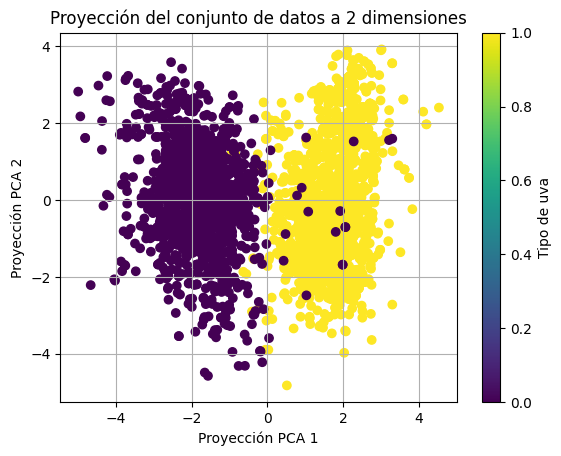

In [146]:
plt.scatter(pca_dataset[:,0], pca_dataset[:,1], c=preprocessed_dataset["type"].map({"Moscatel" : 1 , "Syrah" : 0}), cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar().set_label('Tipo de uva')
plt.show()

Siendo 1(amarillo) el Moscatel y 0(violeta) el Syrah, se puede identificar fácilmente cada tipo de vino en el gráfico.

Graficamos un biplot para ver la interaccion entre las variables.

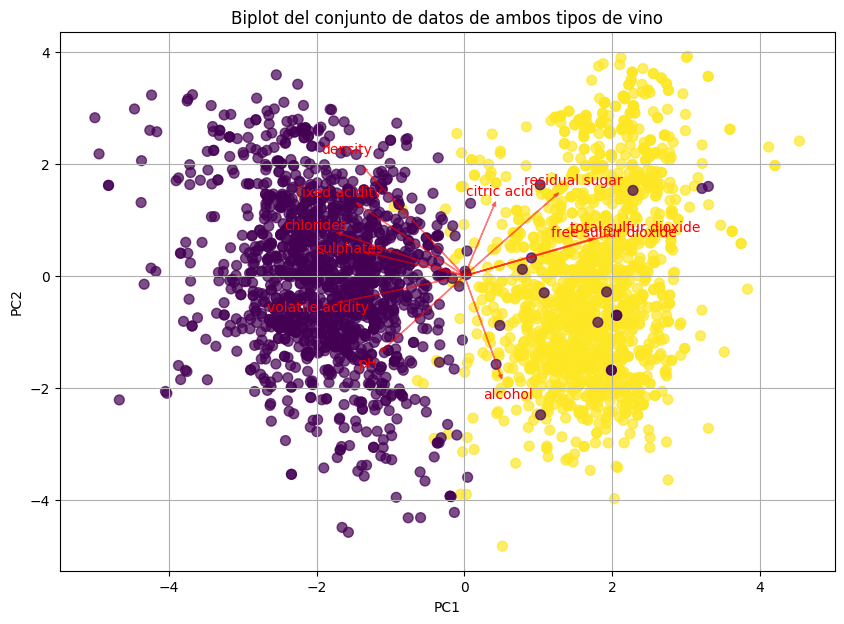

In [147]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(pca_dataset[:, 0], pca_dataset[:, 1], 
           c=preprocessed_dataset["type"].map({"Moscatel" : 1 , "Syrah" : 0}), 
           cmap='viridis', s=50, alpha=0.7)

# Añadir las proyecciones de las variables originales como vectores
for i, (x, y) in enumerate(pca.components_.T):
    ax.arrow(0, 0, x * max(pca_dataset[:, 0]), y * max(pca_dataset[:, 1]), 
             color='r', alpha=0.5, head_width=0.05)
    ax.text(x * max(pca_dataset[:, 0]) * 1.2, y * max(pca_dataset[:, 1]) * 1.2, 
            mv_dataset.columns[i], color='r', ha='center', va='center')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot del conjunto de datos de ambos tipos de vino')

plt.grid()
plt.show()

Vemos la informacion del comportamiento de los dos tipos de vino en relacion a todas las variables.

#### 2.4.1.2. TSNE

Aplicamos TSNE en busca de nueva información.

In [148]:
tsne_dataset = TSNE(n_components=2, random_state=10).fit_transform(dataset_scaled)

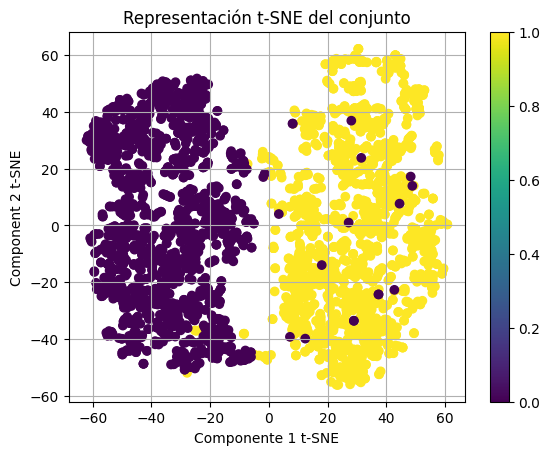

In [154]:
plt.scatter(tsne_dataset[:,0], tsne_dataset[:,1], c=preprocessed_dataset["type"].map({"Moscatel" : 1 , "Syrah" : 0}), cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

No vemos que aporte información adicional.

### 2.4.2. Moscatel

In [155]:
mv_moscatel_dataset=moscatel_dataset.drop(columns="quality")

In [156]:
mv_moscatel_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1587.000000       1587.000000  1587.000000     1587.000000   
mean        6.531065          0.282335     0.304612        6.409924   
std         0.706696          0.099181     0.104944        4.842997   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.100000          0.220000     0.250000        1.900000   
50%         6.500000          0.270000     0.290000        5.300000   
75%         6.900000          0.330000     0.340000        9.800000   
max         9.400000          1.100000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1587.000000          1587.000000           1587.000000  1587.000000   
mean      0.045269            34.940769            128.862319     0.993226   
std       0.020793            16.409145             37.122901     0.002897   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            102.500000     0.990910   
50%       0.043000            33.000000            124.000000     0.992750   
75%       0.050000            45.000000            153.500000     0.995400   
max       0.271000           124.000000            259.000000     0.999710   

                pH    sulphates      alcohol  
count  1587.000000  1587.000000  1587.000000  
mean      3.162098     0.490069    10.849439  
std       0.139806     0.112936     1.308437  
min       2.790000     0.230000     8.400000  
25%       3.070000     0.410000     9.700000  
50%       3.160000     0.480000    10.800000  
75%       3.250000     0.550000    11.900000  
max       3.760000     1.080000    14.200000

Los desvíos son muy distintos (p.e. total sulfur dioxide y volatile acidity), por lo tanto las varianzas también. Tenemos que estandarizar.

In [157]:
scaler = StandardScaler()
moscatel_scaled = scaler.fit_transform(mv_moscatel_dataset)

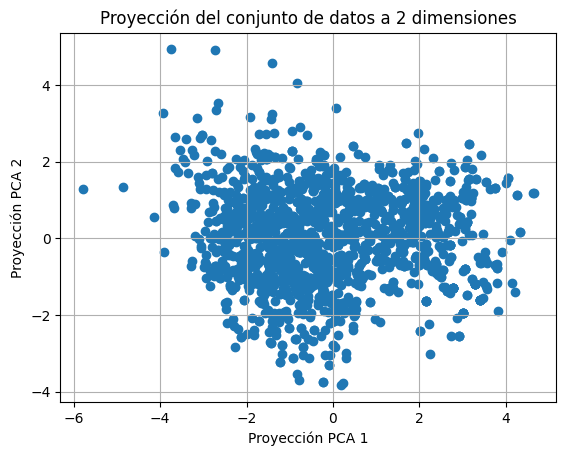

[0.30024623 0.14179767]


In [158]:
pca = PCA(n_components=2)
pca_moscatel = pca.fit_transform(moscatel_scaled)

plt.scatter(pca_moscatel[:,0], pca_moscatel[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()
print(pca.explained_variance_ratio_)

Vemos que el grafico explica alrededor de 44% de la varianza. 30% en la primera componente y 14% en la segunda.

Realizamos un gráfico por cada variable pintando en base a los valores de la misma. 

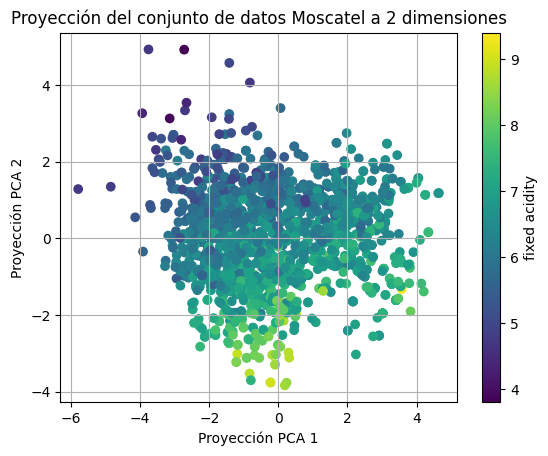

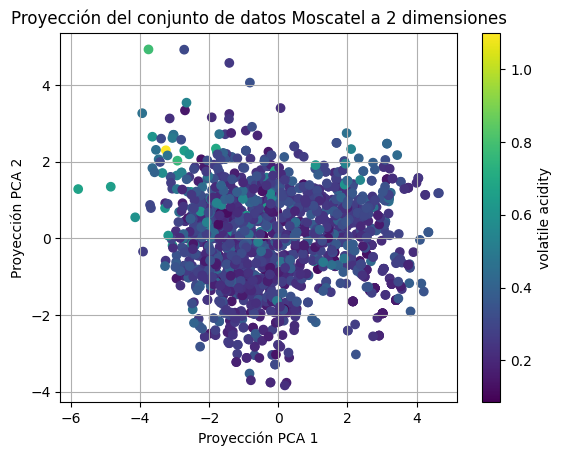

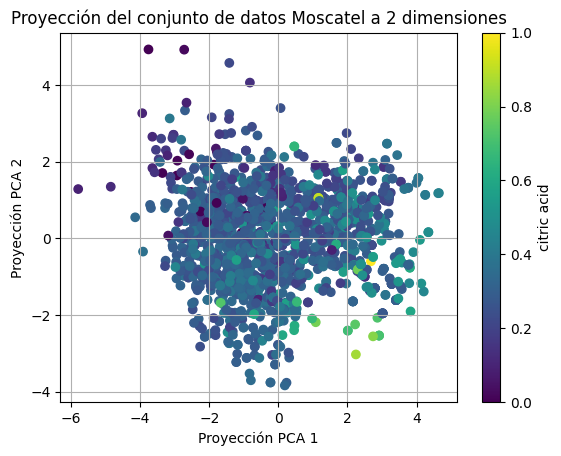

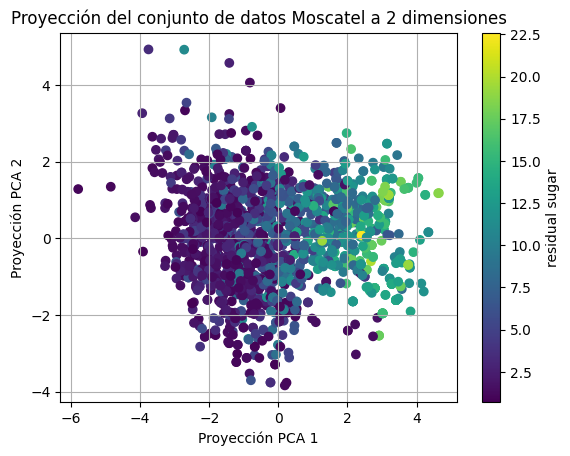

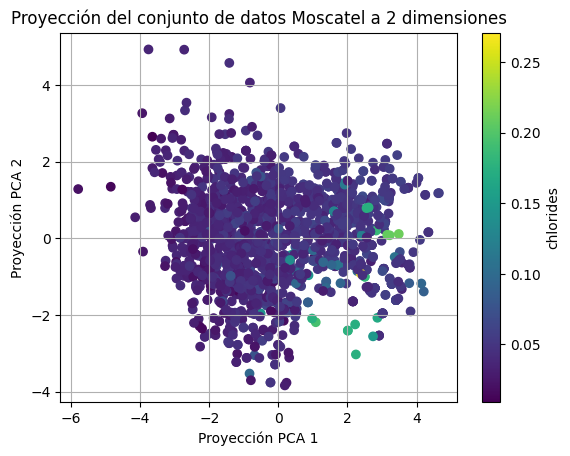

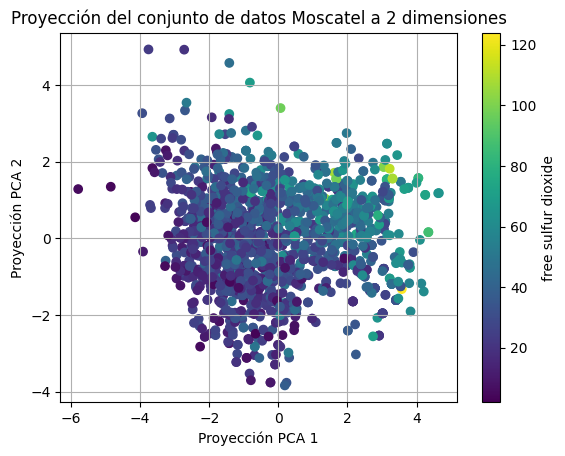

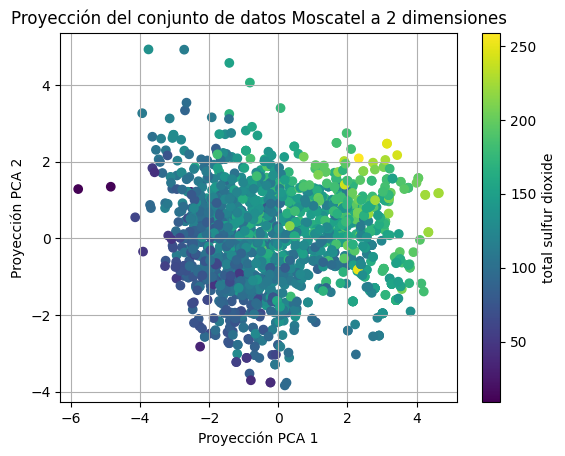

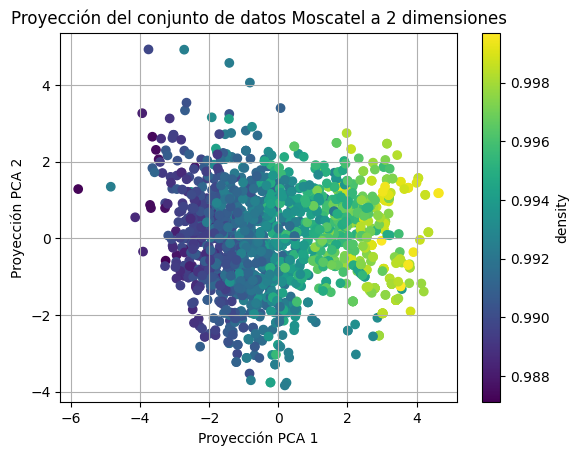

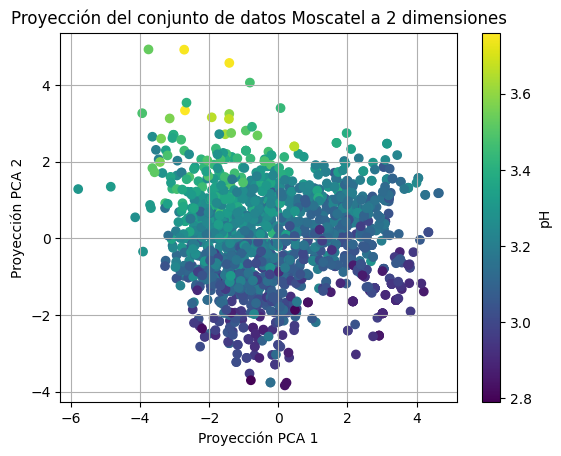

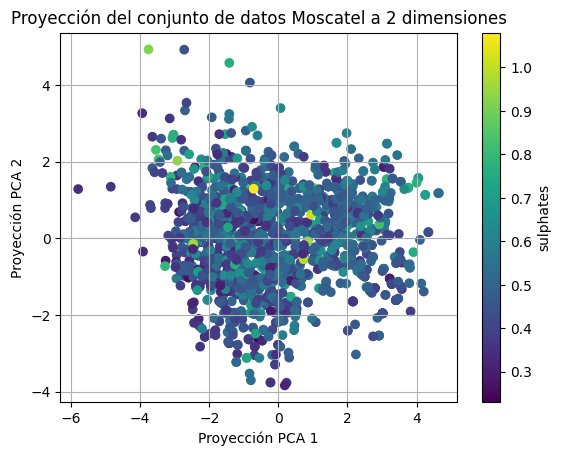

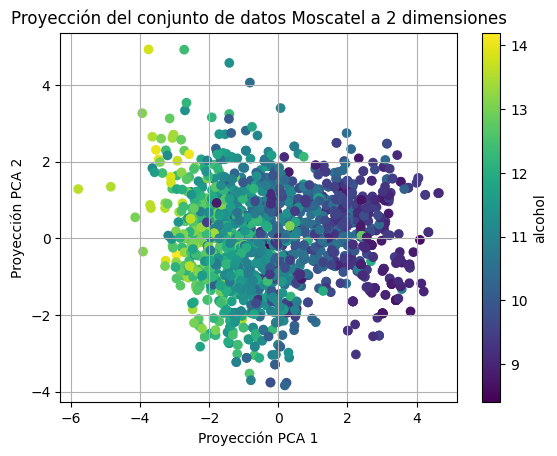

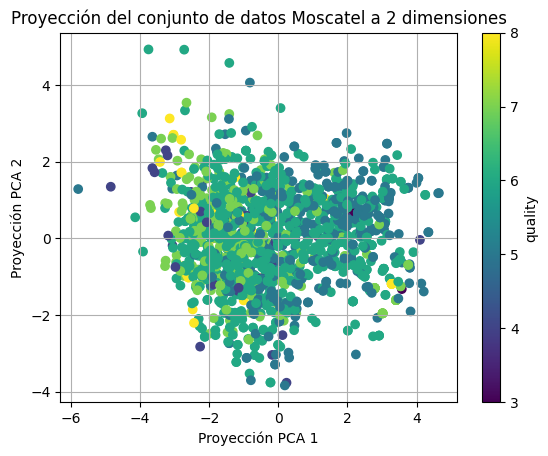

In [159]:
columnas=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

for c in columnas:
    plt.scatter(pca_moscatel[:,0], pca_moscatel[:,1], c=moscatel_dataset[c], cmap='viridis')
    plt.grid(True)
    plt.xlabel('Proyección PCA 1')
    plt.ylabel('Proyección PCA 2')
    plt.title('Proyección del conjunto de datos Moscatel a 2 dimensiones')
    plt.colorbar().set_label(c)
    plt.show()

### 2.4.3. Syrah


In [160]:
mv_syrah_dataset=syrah_dataset.drop(columns="quality")

In [161]:
mv_syrah_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1506.000000       1506.000000  1506.000000     1506.000000   
mean        8.167928          0.529210     0.258513        2.462649   
std         1.576695          0.180678     0.188069        1.190632   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.800000          0.520000     0.250000        2.200000   
75%         9.000000          0.640000     0.410000        2.587500   
max        15.900000          1.580000     0.780000       13.900000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1506.000000          1506.000000           1506.000000  1506.000000   
mean      0.082382            15.853918             46.237052     0.996558   
std       0.025725            10.392364             33.257256     0.001693   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995520   
50%       0.079000            14.000000             37.000000     0.996605   
75%       0.089000            21.750000             61.000000     0.997632   
max       0.270000            72.000000            289.000000     1.001000   

                pH    sulphates      alcohol  
count  1506.000000  1506.000000  1506.000000  
mean      3.320637     0.648088    10.447842  
std       0.149257     0.154624     1.060522  
min       2.870000     0.330000     8.400000  
25%       3.220000     0.550000     9.500000  
50%       3.320000     0.620000    10.200000  
75%       3.410000     0.720000    11.100000  
max       4.010000     1.980000    14.900000

Los desvíos son muy distintos, por lo tanto las varianzas también. Tenemos que estandarizar.

In [162]:
scaler = StandardScaler()
syrah_scaled = scaler.fit_transform(mv_syrah_dataset)

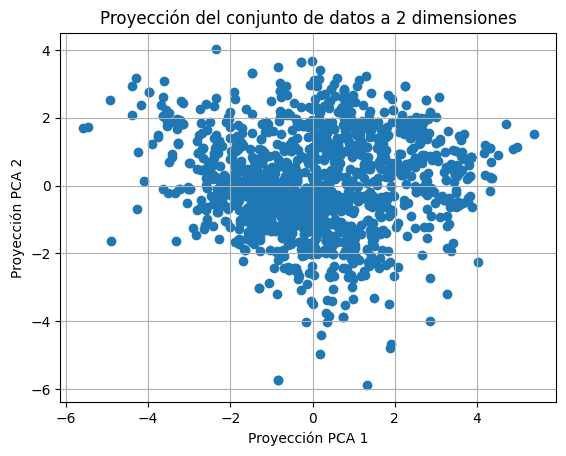

[0.26836772 0.17917035]


In [163]:
pca = PCA(n_components=2)
pca_syrah = pca.fit_transform(syrah_scaled)

plt.scatter(pca_syrah[:,0], pca_syrah[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()
print(pca.explained_variance_ratio_)

Vemos que el grafico explica alrededor de 44% de la varianza. 26% en la primera componente y 17% en la segunda.

Realizamos un gráfico por cada variable pintando en base a los valores de la misma. 

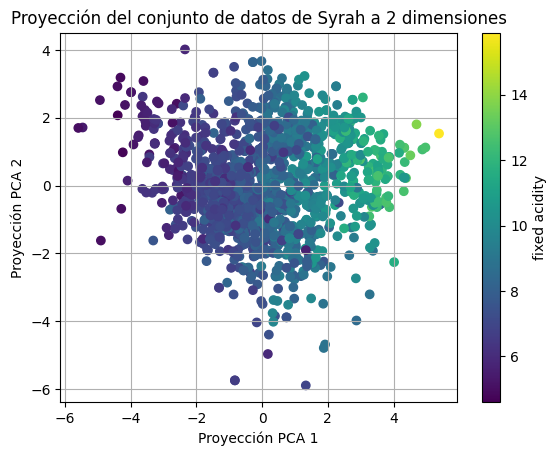

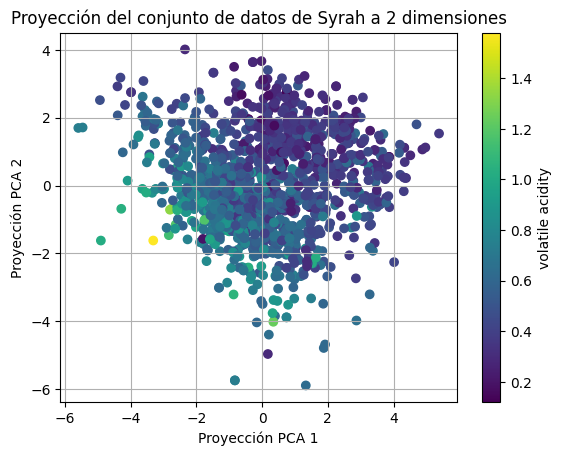

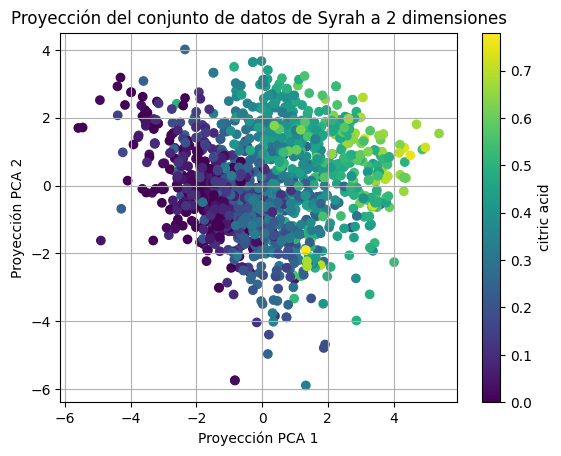

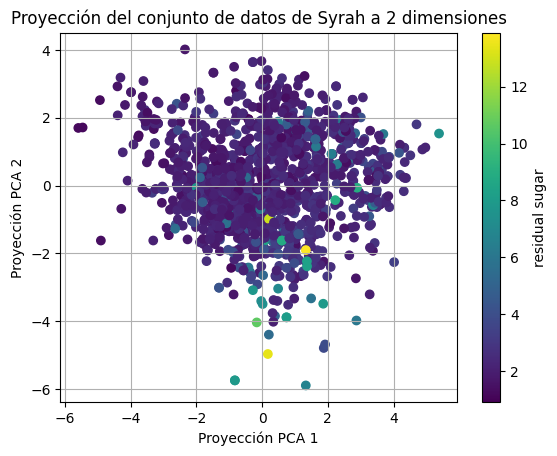

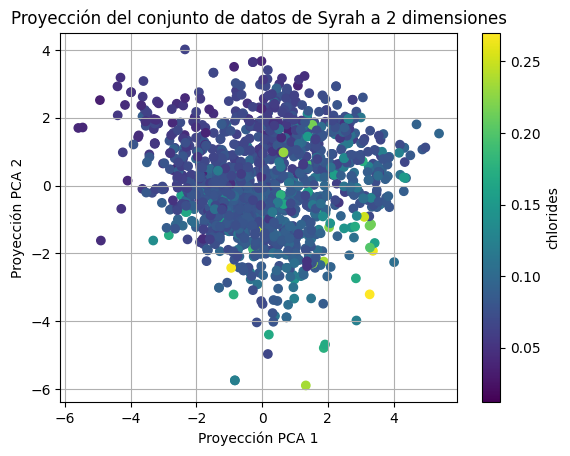

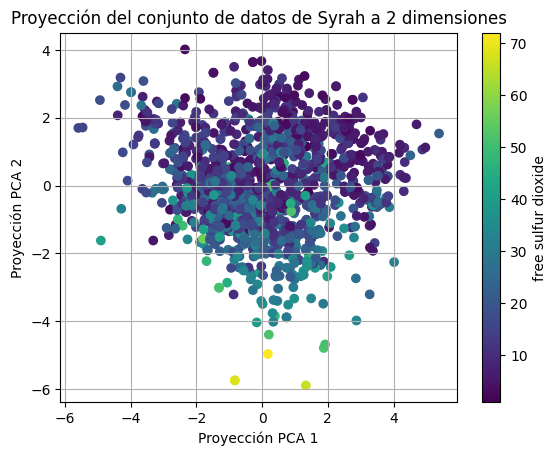

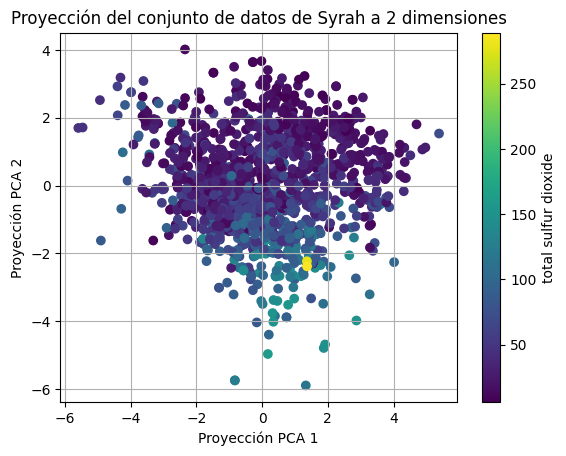

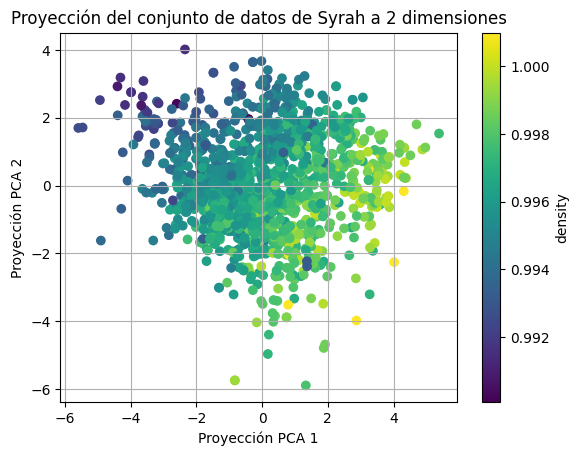

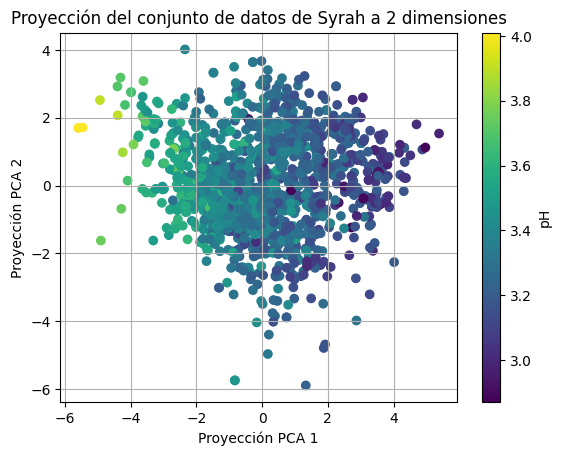

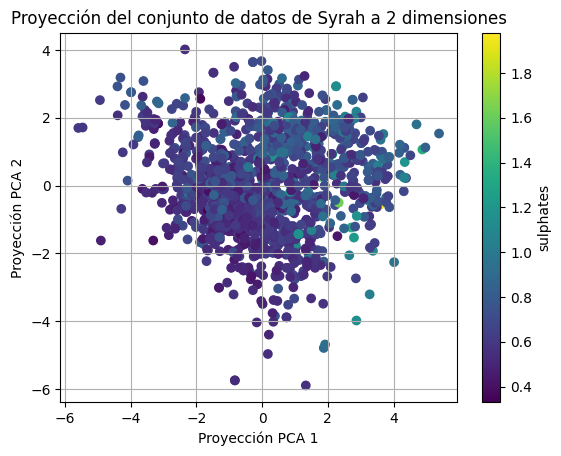

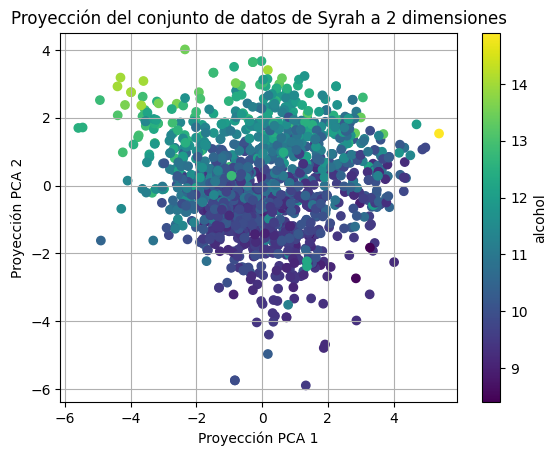

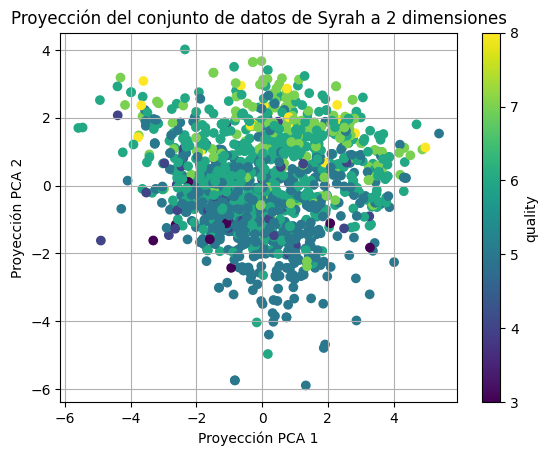

In [164]:
columnas=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

for c in columnas:
    plt.scatter(pca_syrah[:,0], pca_syrah[:,1], c=syrah_dataset[c], cmap='viridis')
    plt.grid(True)
    plt.xlabel('Proyección PCA 1')
    plt.ylabel('Proyección PCA 2')
    plt.title('Proyección del conjunto de datos de Syrah a 2 dimensiones')
    plt.colorbar().set_label(c)
    plt.show()

# 3. Regresiones logísticas

Aplicación de modelos de regresión logística.

## 3.1. Predicción de calidad

Obtenemos un dataset con la variable "quality" ajustada para el desarrollo de este inciso.

In [168]:
rlq_dataset=preprocessed_dataset.copy()
rlq_dataset["quality"]=rlq_dataset["quality"].map({3:"Malo",4:"Malo",5:"Malo",6:"Bueno",7:"Bueno",8:"Bueno"})

Preparamos la estratificacion.

In [169]:
X = rlq_dataset.copy().drop(columns=["quality","type"])
y = rlq_dataset["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

Estandarizamos los estratos.

In [170]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

Creamos el modelo y lo entrenamos con el mejor hiperparametro que se encuentre.

In [180]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logistic_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=10)

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_stand, y_train)

final_logistic_model = grid_search.best_estimator_

Graficamos los coeficientes del modelo logístico.

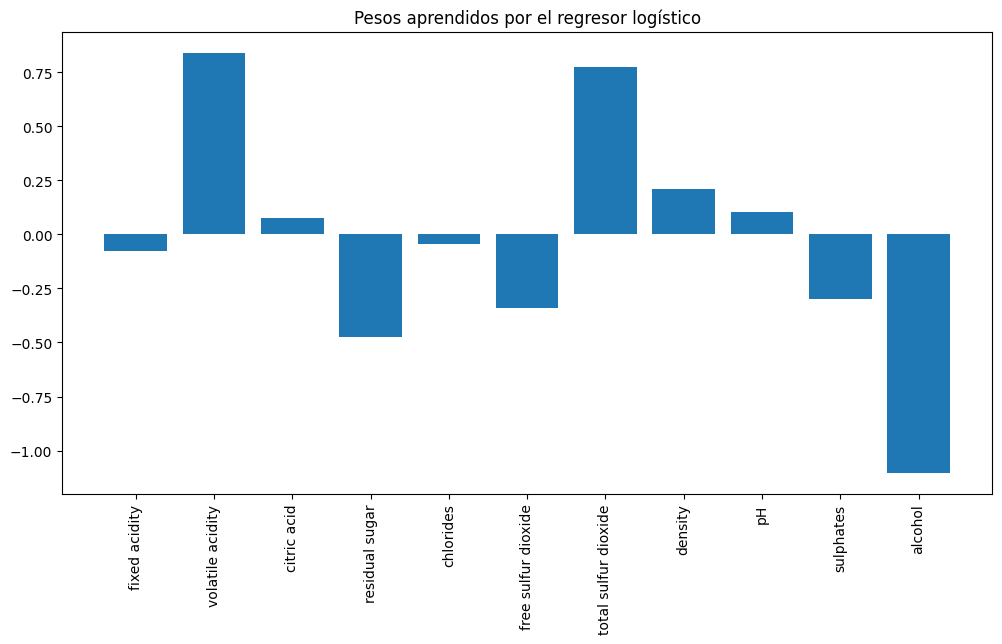

In [181]:
best_theta_logistic = final_logistic_model.coef_

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, best_theta_logistic.size), np.squeeze(best_theta_logistic))
labels = columnas
ax.set_xticks(np.arange(0, best_theta_logistic.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.set_title('Pesos aprendidos por el regresor logístico')
plt.show()

Realizamos el testeo e imprimimos matriz de confusión con la exactitud del modelo.

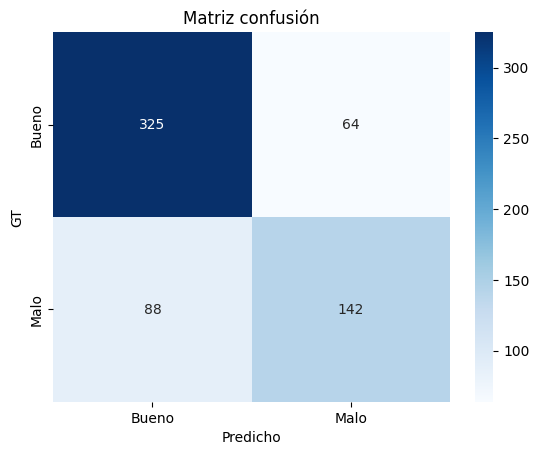

Exactitud del modelo: 0.7544426494345718


In [184]:
y_pred = final_logistic_model.predict(X_test_stand)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_best = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicho')
plt.ylabel('GT')
plt.title('Matriz confusión')
plt.show()

print("Exactitud del modelo:", accuracy)

## 3.2. Predicción de tipo

Obtenemos un dataset para el desarrollo de este inciso.

In [186]:
rlt_dataset=preprocessed_dataset.copy().drop(columns="quality")

Preparamos la estratificacion.

In [187]:
X = rlt_dataset.copy().drop(columns="type")
y = rlt_dataset["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

Estandarizamos los estratos.

In [188]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

Creamos el modelo y lo entrenamos con el mejor hiperparametro que se encuentre.

In [189]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logistic_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=10)

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_stand, y_train)

final_logistic_model = grid_search.best_estimator_

Graficamos los coeficientes del modelo logístico.

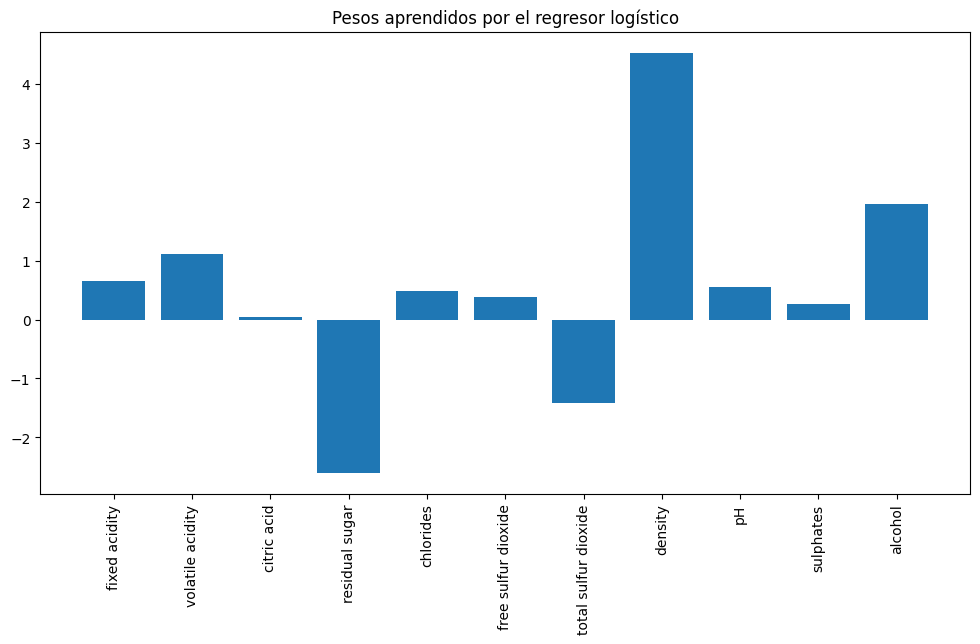

In [190]:
best_theta_logistic = final_logistic_model.coef_

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(np.arange(0, best_theta_logistic.size), np.squeeze(best_theta_logistic))
labels = columnas
ax.set_xticks(np.arange(0, best_theta_logistic.size))
ax.set_xticklabels(labels=labels, rotation=90)
ax.set_title('Pesos aprendidos por el regresor logístico')
plt.show()

Realizamos el testeo e imprimimos matriz de confusión con la exactitud del modelo.

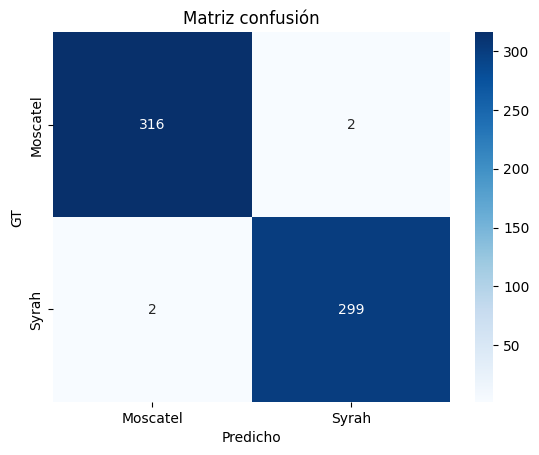

Exactitud del modelo: 0.9935379644588045


In [191]:
y_pred = final_logistic_model.predict(X_test_stand)

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_best = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicho')
plt.ylabel('GT')
plt.title('Matriz confusión')
plt.show()

print("Exactitud del modelo:", accuracy)

# 4. Hipótesis

Desarrollo y prueba de hipótesis.

## 4.1. Los vinos Moscatel tienen mayor dióxido de azúfre total que los vinos Syrah.

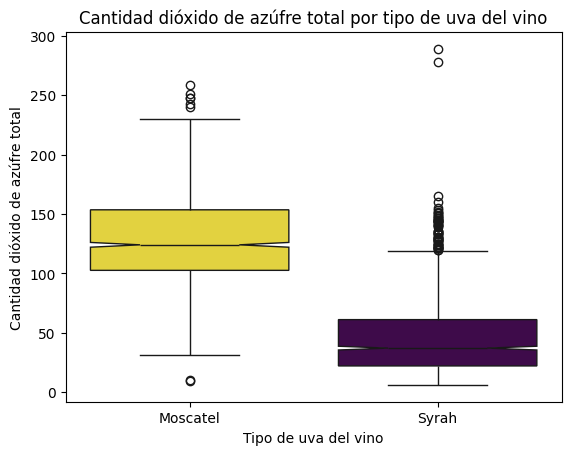

In [119]:
colores=['#fde725','#440154']
sns.boxplot(x='type', y='total sulfur dioxide', data=preprocessed_dataset, notch=True,palette=colores,hue='type')
plt.title("Cantidad dióxido de azúfre total por tipo de uva del vino")
plt.xlabel("Tipo de uva del vino")
plt.ylabel("Cantidad dióxido de azúfre total")
plt.show()

Los notch no se superponen. Esto indica que puede haber diferencias significativas entre los grupos.

Testeamos normalidad con Shapiro Wilk:

In [104]:
from scipy.stats import shapiro

# Separamos los datos en dos
syrah_tsdioxide = preprocessed_dataset[preprocessed_dataset['type'] == "Syrah"]['total sulfur dioxide']
moscatel_tsdioxide = preprocessed_dataset[preprocessed_dataset['type'] == "Moscatel"]['total sulfur dioxide']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_tsdioxide)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_tsdioxide)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.867, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.988, p-valor=0.000


Los datos no tienen distribucion normal.

Testeamos homocedasticidad con Levene:

In [105]:
stat, p = stats.levene(syrah_tsdioxide, moscatel_tsdioxide)
print(f"Test de Levene para total sulfur dioxide: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para total sulfur dioxide: Estadístico=36.083, p-valor=0.000


Los datos no son homocedasticos.

Sin distribución normal ni homocedasticidad, testeamos con Kruskal Wallis:

In [ ]:
# Test de Kruskal-Wallis para comparar total sulfur dioxide entre vinos Moscatel y Syrah.
stat, p = stats.kruskal(syrah_tsdioxide, moscatel_tsdioxide)
print(f"Test de Kruskal-Wallis para total sulfur dioxide: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05 
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la cantidad de dióxido de azúfre total entre vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la cantidad de dióxido de azúfre total entre vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para total sulfur dioxide: Estadístico=1834.950, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la cantidad de dióxido de azúfre total entre vinos Syrah y Moscatel.


## 4.2. Los vinos Syrah tienen mayor densidad que los vinos Moscatel.

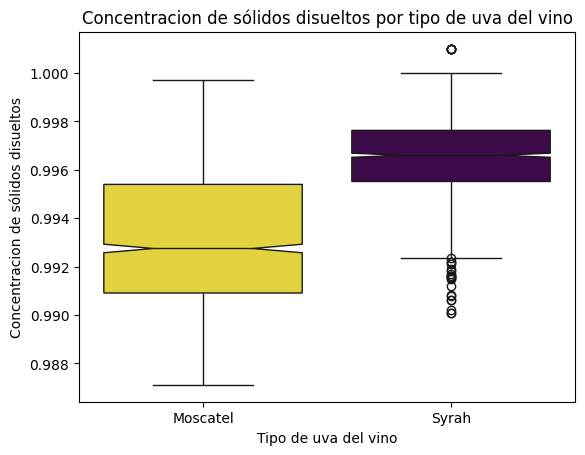

In [126]:
colores=['#fde725','#440154']
sns.boxplot(x='type', y='density', data=preprocessed_dataset, notch=True,palette=colores,hue='type')
plt.title("Concentracion de sólidos disueltos por tipo de uva del vino")
plt.xlabel("Tipo de uva del vino")
plt.ylabel("Concentracion de sólidos disueltos")
plt.show()

Los notch no se superponen. Esto indica que puede haber diferencias significativas entre los grupos.

Testeamos normalidad con Shapiro Wilk:

In [ ]:
syrah_density = preprocessed_dataset[preprocessed_dataset['type'] == "Syrah"]['density']
moscatel_density = preprocessed_dataset[preprocessed_dataset['type'] == "Moscatel"]['density']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_density)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_density)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.989, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.966, p-valor=0.000


Los datos no tienen distribucion normal.

Testeamos homocedasticidad con Levene:

In [ ]:
stat, p = stats.levene(syrah_density, moscatel_density)
print(f"Test de Levene para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol: Estadístico=262.438, p-valor=0.000


Los datos no son homocedasticos.

Sin distribución normal ni homocedasticidad, testeamos con Kruskal Wallis:

In [ ]:
# Test de Kruskal-Wallis para comparar density entre vinos Syrah y Moscatel.
stat, p = stats.kruskal(syrah_density, moscatel_density)
print(f"Test de Kruskal-Wallis para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05 
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la concentracion de sólidos entre vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la concentracion de sólidos entre vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para density: Estadístico=1114.358, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la concentracion de sólidos entre vinos Syrah y Moscatel.


## 4.3. Los vinos Moscatel tienen mayor azúcar residual que los vinos Syrah.

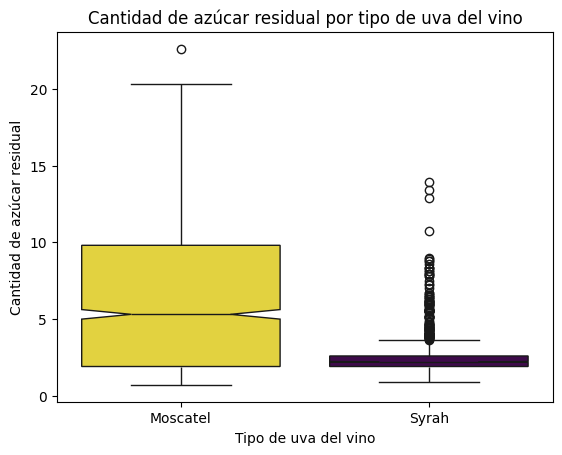

In [127]:
colores=['#fde725','#440154']
sns.boxplot(x='type', y='residual sugar', data=preprocessed_dataset, notch=True, palette=colores, hue='type')
plt.title("Cantidad de azúcar residual por tipo de uva del vino")
plt.xlabel("Tipo de uva del vino")
plt.ylabel("Cantidad de azúcar residual")
plt.show()

Los notch no se superponen. Esto indica que puede haber diferencias significativas entre los grupos.

Testeamos normalidad con Shapiro Wilk:

In [ ]:
syrah_rsugar = preprocessed_dataset[preprocessed_dataset['type'] == "Syrah"]['residual sugar']
moscatel_rsugar = preprocessed_dataset[preprocessed_dataset['type'] == "Moscatel"]['residual sugar']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_rsugar)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_rsugar)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.624, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.897, p-valor=0.000


Los datos no tienen distribucion normal.

Testeamos homocedasticidad con Levene:

In [ ]:
stat, p = stats.levene(syrah_rsugar, moscatel_rsugar)
print(f"Test de Levene para residual sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para residual sugar: Estadístico=1541.464, p-valor=0.000


Los datos no son homocedasticos.

Sin distribución normal ni homocedasticidad, testeamos con Kruskal Wallis:

In [ ]:
# Test de Kruskal-Wallis para comparar residual sugar entre vinos Syrah y Moscatel.
stat, p = stats.kruskal(syrah_rsugar, moscatel_rsugar)
print(f"Test de Kruskal-Wallis para residual sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05 
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la cantidad de azúcar residual entre vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la cantidad de azúcar residual entre vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para residual sugar: Estadístico=190.613, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la cantidad de azúcar residual entre vinos Syrah y Moscatel.


## 4.4. Los vinos Moscatel tienen mayor alcohol que los vinos Syrah

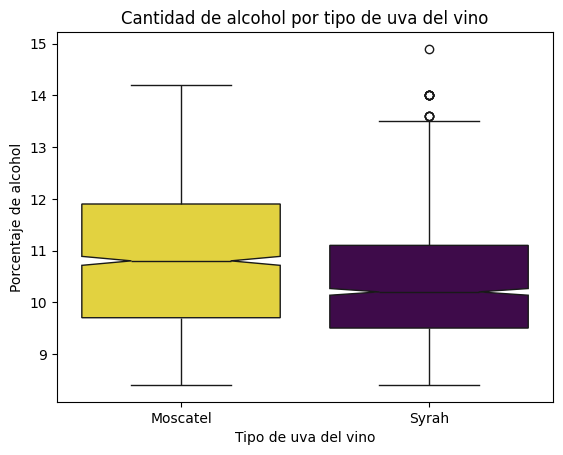

In [128]:
colores=['#fde725','#440154']
sns.boxplot(x='type', y='alcohol', data=preprocessed_dataset, notch=True,palette=colores, hue='type')
plt.title("Cantidad de alcohol por tipo de uva del vino")
plt.xlabel("Tipo de uva del vino")
plt.ylabel("Porcentaje de alcohol")
plt.show()

Los notch no se superponen. Esto indica que puede haber diferencias significativas entre los grupos.

Testeamos normalidad con Shapiro Wilk:

In [ ]:
syrah_alcohol = preprocessed_dataset[preprocessed_dataset['type'] == "Syrah"]['alcohol']
moscatel_alcohol = preprocessed_dataset[preprocessed_dataset['type'] == "Moscatel"]['alcohol']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_alcohol)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_alcohol)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.930, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.967, p-valor=0.000


Los datos no tienen distribucion normal.

Testeamos homocedasticidad con Levene:

In [109]:
stat, p = stats.levene(syrah_alcohol, moscatel_alcohol)
print(f"Test de Levene para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol: Estadístico=99.565, p-valor=0.000


Los datos no son homocedasticos.

Sin distribución normal ni homocedasticidad, testeamos con Kruskal Wallis:

In [ ]:
# Test de Kruskal-Wallis para comparar alcohol entre vinos de Moscatel y Syrah.
stat, p = stats.kruskal(syrah_alcohol, moscatel_alcohol)
print(f"Test de Kruskal-Wallis para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05 
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para alcohol: Estadístico=67.222, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.


## 4.5. Los vinos con mayor contenido alcohólico tienen mayores puntuaciones de calidad.

Obtenemos un dataset con los grupos de calidad ajustados.

In [130]:
dataset_2q=preprocessed_dataset.copy()
dataset_2q["quality"]=dataset_2q["quality"].map({3:"Malo",4:"Malo",5:"Malo",6:"Bueno",7:"Bueno",8:"Bueno"})

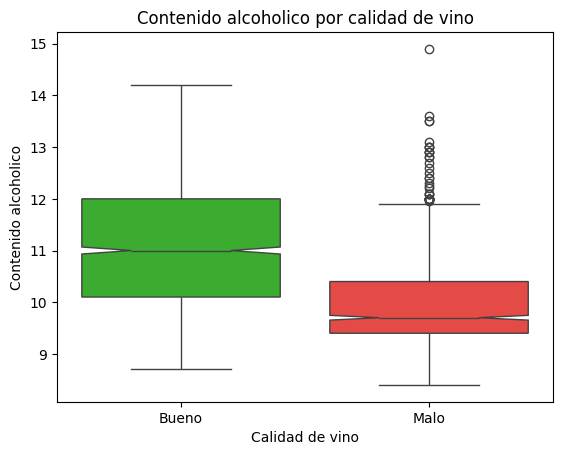

In [131]:
colores = ['#2CC01C', '#FF322C']
sns.boxplot(x='quality', y='alcohol', data=dataset_2q, notch=True, palette=colores,hue='quality')
plt.title("Contenido alcoholico por calidad de vino")
plt.xlabel("Calidad de vino")
plt.ylabel("Contenido alcoholico")
plt.show()

Los notch no se superponen. Esto indica que puede haber diferencias significativas entre los grupos.

Testeamos normalidad con Shapiro Wilk:

In [ ]:
malos = dataset_2q[dataset_2q['quality'] == "Malo"]['alcohol']
buenos = dataset_2q[dataset_2q['quality'] == "Bueno"]['alcohol']

# Test de Shapiro-Wilk para vinos malos
stat, p = shapiro(malos)
print(f"Test de Shapiro-Wilk para vinos malos: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos buenos
stat, p = shapiro(buenos)
print(f"Test de Shapiro-Wilk para vinos buenos: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos malos: Estadístico=0.886, p-valor=0.000
Test de Shapiro-Wilk para vinos buenos: Estadístico=0.985, p-valor=0.000


Los datos no tienen distribucion normal.

Testeamos homocedasticidad con Levene:

In [170]:
stat, p = stats.levene(buenos, malos)
print(f"Test de Levene para contenido alcoholico: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para contenido alcoholico: Estadístico=168.424, p-valor=0.000


Los datos no son homocedasticos.

Sin distribución normal ni homocedasticidad, testeamos con Kruskal Wallis:

In [ ]:
# Test de Kruskal-Wallis para comparar contenido alcoholico entre vinos malos y buenos.
stat, p = stats.kruskal(buenos, malos)
print(f"Test de Kruskal-Wallis para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el contenido alcoholico entre vinos buenos y malos.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el contenido alcoholico entre vinos buenos y malos.")

Test de Kruskal-Wallis para alcohol: Estadístico=635.810, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el contenido alcoholico entre vinos buenos y malos.


## 4.6. Los vinos con mayor cantidad de ácidos volátiles tienen menor puntuación.

Obtenemos un dataset con la variable 'quality' ajustada.

In [132]:
dataset_2q=preprocessed_dataset.copy()
dataset_2q["quality"]=dataset_2q["quality"].map({3:"Malo",4:"Malo",5:"Malo",6:"Bueno",7:"Bueno",8:"Bueno"})

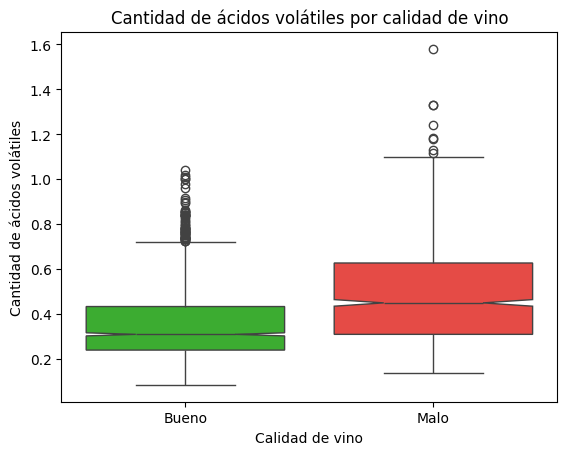

In [133]:
colores = ['#2CC01C', '#FF322C']
sns.boxplot(x='quality', y='volatile acidity', data=dataset_2q, notch=True,palette=colores,hue='quality')
plt.title("Cantidad de ácidos volátiles por calidad de vino")
plt.xlabel("Calidad de vino")
plt.ylabel("Cantidad de ácidos volátiles")
plt.show()

Los notch no se superponen. Esto indica que puede haber diferencias significativas entre los grupos.

Testeamos normalidad con Shapiro Wilk:

In [ ]:
malos = dataset_2q[dataset_2q['quality'] == "Malo"]['volatile acidity']
buenos = dataset_2q[dataset_2q['quality'] == "Bueno"]['volatile acidity']

# Test de Shapiro-Wilk para vinos malos
stat, p = shapiro(malos)
print(f"Test de Shapiro-Wilk para vinos malos: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos buenos
stat, p = shapiro(buenos)
print(f"Test de Shapiro-Wilk para vinos buenos: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos malos: Estadístico=0.950, p-valor=0.000
Test de Shapiro-Wilk para vinos buenos: Estadístico=0.917, p-valor=0.000


Los datos no tienen distribucion normal.

Testeamos homocedasticidad con Levene:

In [135]:
stat, p = stats.levene(buenos, malos)
print(f"Test de Levene para cantidad de ácidos volátiles: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para cantidad de ácidos volátiles: Estadístico=113.652, p-valor=0.000


Los datos no son homocedasticos.

Sin distribución normal ni homocedasticidad, testeamos con Kruskal Wallis:

In [ ]:
# Test de Kruskal-Wallis para comparar cantidad de ácidos volátiles entre vinos malos y buenos.
stat, p = stats.kruskal(buenos, malos)
print(f"Test de Kruskal-Wallis para volatile acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

alpha = 0.05 
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la cantidad de ácidos volátiles entre vinos buenos y malos.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la cantidad de ácidos volátiles entre vinos buenos y malos.")

Test de Kruskal-Wallis para volatile acidity: Estadístico=337.303, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la cantidad de ácidos volátiles entre vinos buenos y malos.
